In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [30]:
df = pd.read_csv('netflix.csv')

A. Analysis:
1. Perform EDA and display:
- Summary of the data

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


A. Analysis:
1. Perform EDA and display: 
- Shape of the data


In [32]:
df.shape

(8807, 12)

A. Analysis:
1. Perform EDA and display: 
- Missing Value Detection


In [33]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

A. Analysis:
1. Perform EDA and display: 
- Duplicate Value Check


In [34]:
df.duplicated().sum()

np.int64(0)

A. Analysis:
1. Perform EDA and display:  (5 marks)
- Rename 'listed_in' column to 'Genre'


In [35]:
df.rename({'listed_in':'genre'}, axis=1, inplace=True)
df['genre']

0                                           Documentaries
1         International TV Shows, TV Dramas, TV Mysteries
2       Crime TV Shows, International TV Shows, TV Act...
3                                  Docuseries, Reality TV
4       International TV Shows, Romantic TV Shows, TV ...
                              ...                        
8802                       Cult Movies, Dramas, Thrillers
8803               Kids' TV, Korean TV Shows, TV Comedies
8804                              Comedies, Horror Movies
8805                   Children & Family Movies, Comedies
8806       Dramas, International Movies, Music & Musicals
Name: genre, Length: 8807, dtype: object

A. Analysis:
2. Unnest the director, cast, country and Genre columns.   (5 marks)


In [36]:
df['director'] = df['director'].str.split(', ')
df['cast'] = df['cast'].str.split(', ') 
df['country'] = df['country'].str.split(', ')
df['genre'] = df['genre'].str.split(', ')


In [37]:
df = df.explode('director')
df = df.explode('cast')
df = df.explode('country')
df = df.explode('genre')

In [38]:
df[['director','cast','country','genre']]

,director,cast,country,genre
0,Kirsten Johnson,NaN,United States,Documentaries
1,NaN,Ama Qamata,South Africa,International TV Shows
1,NaN,Ama Qamata,South Africa,TV Dramas
1,NaN,Ama Qamata,South Africa,TV Mysteries
1,NaN,Khosi Ngema,South Africa,International TV Shows
...,...,...,...,...
8806,Mozez Singh,Anita Shabdish,India,International Movies
8806,Mozez Singh,Anita Shabdish,India,Music & Musicals
8806,Mozez Singh,Chittaranjan Tripathy,India,Dramas
8806,Mozez Singh,Chittaranjan Tripathy,India,International Movies


A. Analysis:
3. Drop description and show_id columns.   (1 mark)


In [39]:
df.drop(['description'], axis=1, inplace=True)

In [40]:
df.drop(['show_id'], axis=1, inplace=True)

In [41]:
df.columns

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genre'],
      dtype='object')

A. Analysis:
4. Create added_year column from the date_added column.   (2 marks)


In [42]:
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed')
df['added_year'] = df['date_added'].dt.year
df['added_year']

0       2021.0
1       2021.0
1       2021.0
1       2021.0
1       2021.0
         ...  
8806    2019.0
8806    2019.0
8806    2019.0
8806    2019.0
8806    2019.0
Name: added_year, Length: 201991, dtype: float64

In [28]:
df.columns

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genre', 'added_year'],
      dtype='object')

A. Analysis:
5. Find the best actor-director pair.

In [68]:
df1 = pd.read_csv('netflix.csv')

In [69]:
df1.dropna(subset=['director', 'cast'], inplace=True)
df1.isna().sum()

show_id           0
type              0
title             0
director          0
cast              0
country         364
date_added        0
release_year      0
rating            1
duration          3
listed_in         0
description       0
dtype: int64

In [70]:
df1['director'] = df1['director'].str.split(', ')
df1['cast'] = df1['cast'].str.split(', ')

In [71]:
df1 = df1.explode('director')
df1 = df1.explode('cast')

In [ ]:
df1 [['director', 'cast']]

,director,cast
2,Julien Leclercq,Sami Bouajila
2,Julien Leclercq,Tracy Gotoas
2,Julien Leclercq,Samuel Jouy
2,Julien Leclercq,Nabiha Akkari
2,Julien Leclercq,Sofia Lesaffre
...,...,...
8806,Mozez Singh,Manish Chaudhary
8806,Mozez Singh,Meghna Malik
8806,Mozez Singh,Malkeet Rauni
8806,Mozez Singh,Anita Shabdish


In [72]:
df1[['director', 'cast']].value_counts()

director       cast          
Rajiv Chilaka  Rajesh Kava       19
               Julie Tejwani     19
               Jigna Bhardwaj    18
               Rupa Bhimani      18
               Vatsal Dubey      16
                                 ..
Şenol Sönmez   Seda Güven         1
               Somer Karvan       1
               Yosi Mizrahi       1
               Zerrin Sümer       1
A. L. Vijay    Hema               1
Name: count, Length: 48186, dtype: int64

A. Analysis:
6. Drop null rows in the duration column and convert it into numerical data. ex - 90 min ---> 90, 2 seasons ---> 2    (3 marks)


In [52]:
df.dropna(subset=['duration'], inplace=True)

In [53]:
df[['duration_num', 'duration_type']] = df['duration'].str.split(' ', expand=True)

In [57]:
df .drop('duration', axis=1, inplace=True)

A. Analysis:
7. Which actors have the most number of movies in a particular rating category?   (4 marks)


In [73]:
df2 = pd.read_csv('netflix.csv')

In [74]:
df2['cast'] = df2['cast'].str.split(', ')
df2 = df2.explode('cast')

In [75]:
df2 [['rating', 'cast', 'type']].value_counts()

rating  cast                type 
TV-14   Anupam Kher         Movie    27
        Shah Rukh Khan      Movie    26
TV-Y7   Julie Tejwani       Movie    25
        Rupa Bhimani        Movie    24
        Rajesh Kava         Movie    20
                                     ..
UR      Nick Swardson       Movie     1
        Paloma Picasso      Movie     1
        Pascale Christophe  Movie     1
        Paul Hamy           Movie     1
        Hafsia Herzi        Movie     1
Name: count, Length: 50033, dtype: int64

B. Visualization: (4 marks each)
1. What is the distribution of the content types (Movies vs TV Shows)?


In [76]:
df3 = pd.read_csv('netflix.csv')

C:\Users\asma\AppData\Local\Temp\ipykernel_10996\456477608.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette='Pastel2')


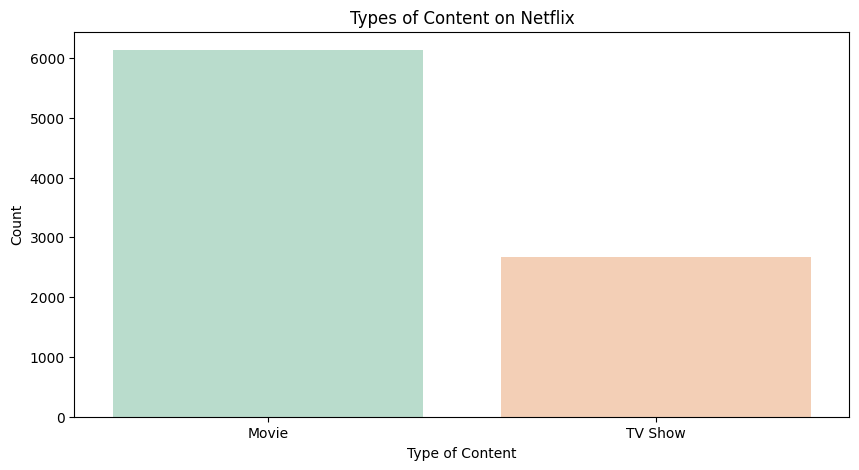

In [84]:
y = df3['type'].value_counts()
x = df3['type'].unique()
plt.figure(figsize=(10, 5))
sns.barplot(x=x, y=y, palette='Pastel2') 
plt.title('Types of Content on Netflix')
plt.xlabel('Type of Content')
plt.ylabel('Count')
plt.show()

B. Visualization:
2. How many movies were released each year after 2018?


In [101]:
df4=pd.read_csv('netflix.csv')

In [102]:
df4['release_year'] = pd.to_datetime(df4['release_year'], format='mixed')
df4['release_year'] = df4['release_year'].dt.year
df4['release_year']

0       1970
1       1970
2       1970
3       1970
4       1970
        ... 
8802    1970
8803    1970
8804    1970
8805    1970
8806    1970
Name: release_year, Length: 8807, dtype: int32

In [103]:
x = df4.groupby('release_year')['title'].value_counts()
x

release_year  title                        
1970          #Alive                           1
              #AnneFrank - Parallel Stories    1
              #FriendButMarried                1
              #FriendButMarried 2              1
              #Roxy                            1
                                              ..
              忍者ハットリくん                         1
              海的儿子                             1
              마녀사냥                             1
              반드시 잡는다                          1
              최강전사 미니특공대 : 영웅의 탄생              1
Name: count, Length: 8807, dtype: int64

In [117]:
y = df4['release_year']
y


0       1970
1       1970
2       1970
3       1970
4       1970
        ... 
8802    1970
8803    1970
8804    1970
8805    1970
8806    1970
Name: release_year, Length: 8807, dtype: int32

In [118]:
x = df4.groupby('release_year')['title'].value_counts()
y =df4['release_year']
plt.figure(figsize=(10, 5))
sns.barplot(x=x, y=y, palette='Pastel2') 
plt.title('movies released each year')
plt.xlabel('movies released each year')
plt.ylabel('release_year')
plt.show()

NotImplementedError: Can only union MultiIndex with MultiIndex or Index of tuples, try mi.to_flat_index().union(other) instead.

<Figure size 1000x500 with 0 Axes>

B. Visualization:
4. What is the distribution of content across different genres?


In [128]:
df5 = pd.read_csv('netflix.csv')

In [129]:
df5.rename({'listed_in':'genre'}, axis=1, inplace=True)
df5['genre'] 

0                                           Documentaries
1         International TV Shows, TV Dramas, TV Mysteries
2       Crime TV Shows, International TV Shows, TV Act...
3                                  Docuseries, Reality TV
4       International TV Shows, Romantic TV Shows, TV ...
                              ...                        
8802                       Cult Movies, Dramas, Thrillers
8803               Kids' TV, Korean TV Shows, TV Comedies
8804                              Comedies, Horror Movies
8805                   Children & Family Movies, Comedies
8806       Dramas, International Movies, Music & Musicals
Name: genre, Length: 8807, dtype: object

In [130]:
df5 ['genre'] = df5 ['genre'].str.split(', ')
df5 = df5.explode(['genre'])
df5['genre']

0                  Documentaries
1         International TV Shows
1                      TV Dramas
1                   TV Mysteries
2                 Crime TV Shows
                  ...           
8805    Children & Family Movies
8805                    Comedies
8806                      Dramas
8806        International Movies
8806            Music & Musicals
Name: genre, Length: 19323, dtype: object

In [132]:
df5.groupby('genre')['type'].value_counts()

genre                         type   
Action & Adventure            Movie       859
Anime Features                Movie        71
Anime Series                  TV Show     176
British TV Shows              TV Show     253
Children & Family Movies      Movie       641
Classic & Cult TV             TV Show      28
Classic Movies                Movie       116
Comedies                      Movie      1674
Crime TV Shows                TV Show     470
Cult Movies                   Movie        71
Documentaries                 Movie       869
Docuseries                    TV Show     395
Dramas                        Movie      2427
Faith & Spirituality          Movie        65
Horror Movies                 Movie       357
Independent Movies            Movie       756
International Movies          Movie      2752
International TV Shows        TV Show    1351
Kids' TV                      TV Show     451
Korean TV Shows               TV Show     151
LGBTQ Movies                  Movie       

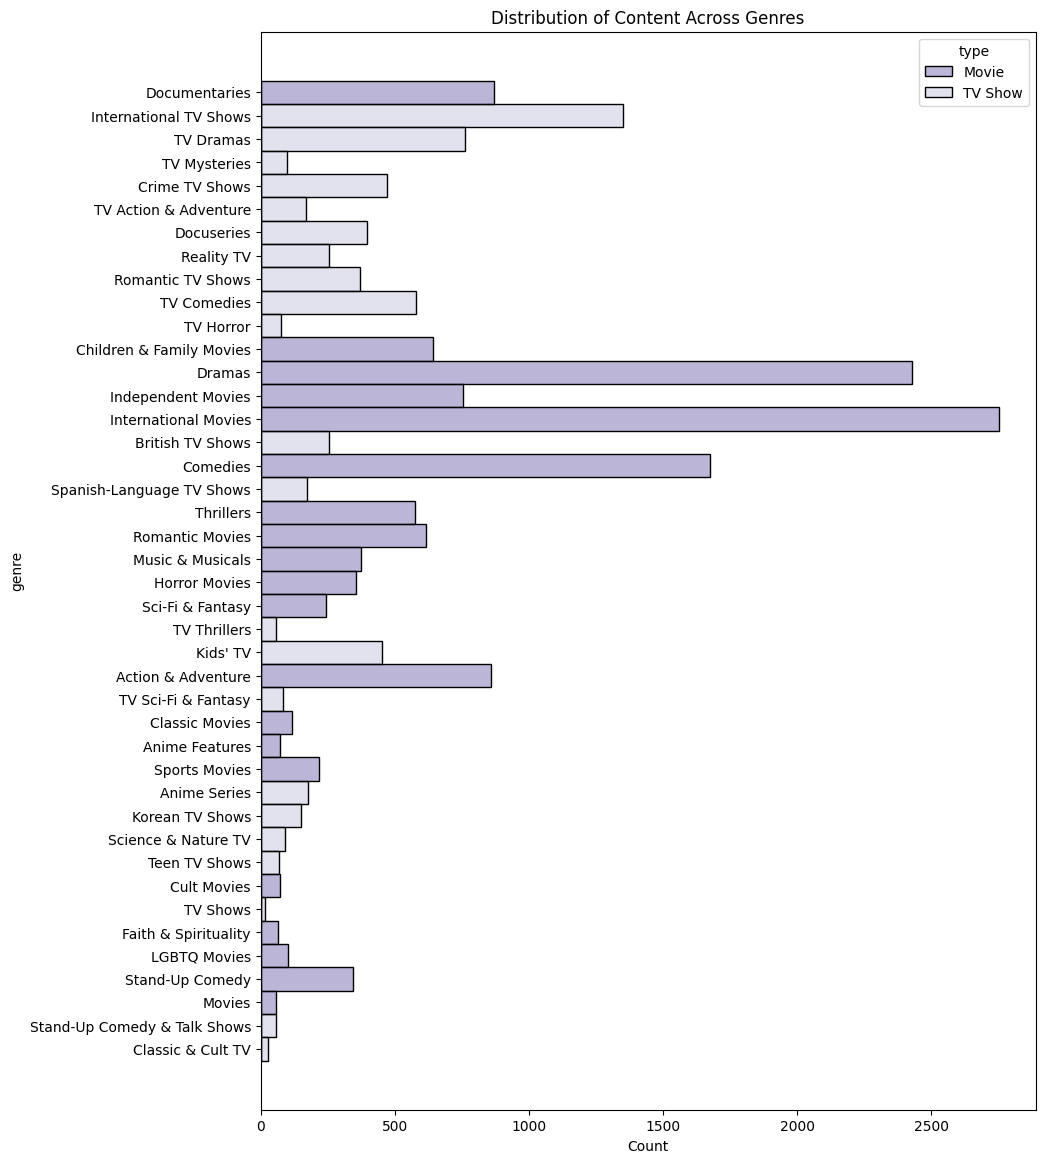

In [135]:
plt.figure(figsize=(10,14))
sns.histplot(y = df5['genre'],hue = df5['type'], palette='Purples_r')
plt.title('Distribution of Content Across Genres')
plt.xticks(fontsize=10)
plt.show()

B. Visualization:
5. Which are the top countries that produce the most content on Netflix?


In [136]:
df6 = pd.read_csv('netflix.csv')

In [137]:
df6['country'] = df6['country'].str.split(', ')
df6 = df6.explode('country')

C:\Users\asma\AppData\Local\Temp\ipykernel_10996\2166797877.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=c.index, y=c.values, palette='Pastel2')


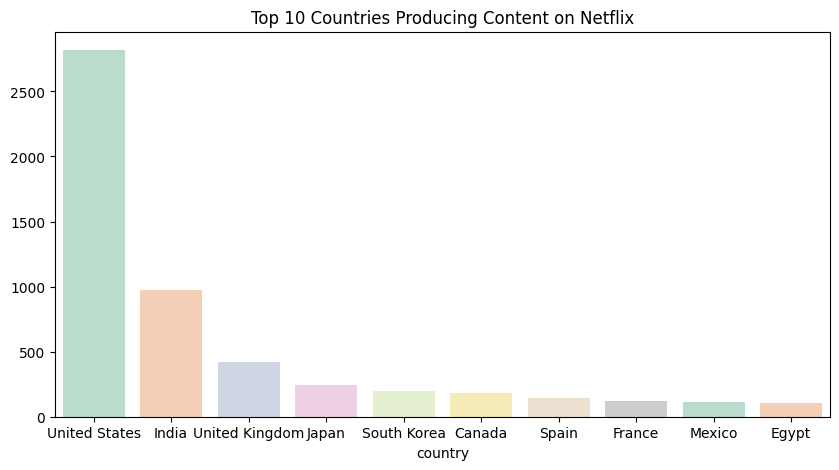

In [138]:
c = df3['country'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=c.index, y=c.values, palette='Pastel2')
plt.title('Top 10 Countries Producing Content on Netflix')  
plt.show()

B. Visualization:
6. How has the number of shows and movies added to Netflix changed each year? Display the trend.


In [139]:
df7 = pd.read_csv('netflix.csv')

In [140]:
df7 ['added_year'] = df7['date_added'].astype(str)
df7['added_year'] = df7['added_year'].str.split(', ').str[-1]
df7 ['added_year']

0       2021
1       2021
2       2021
3       2021
4       2021
        ... 
8802    2019
8803    2019
8804    2019
8805    2020
8806    2019
Name: added_year, Length: 8807, dtype: object

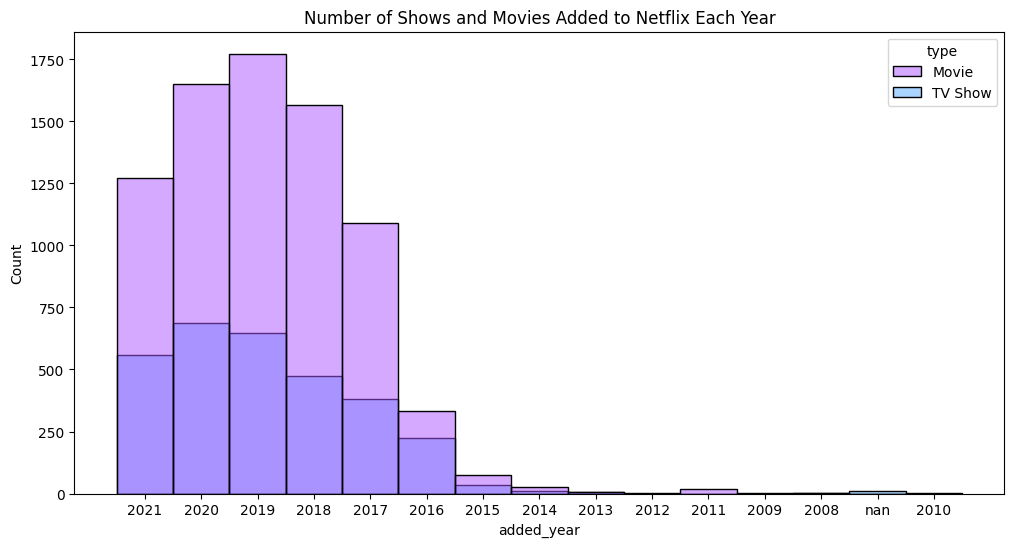

In [149]:
plt.figure(figsize=(12, 6))
sns.histplot(x=df7['added_year'], hue=df6['type'],palette='cool_r')
plt.title('Number of Shows and Movies Added to Netflix Each Year')
plt.show()

B. Visualization:
7. Who are the top 5 most frequent actors featured in the top 3 most represented genres on the platform?


In [150]:
df8 = pd.read_csv('netflix.csv')

In [151]:
df8.rename({'listed_in':'genre'}, axis=1, inplace=True)
df8['genre']

0                                           Documentaries
1         International TV Shows, TV Dramas, TV Mysteries
2       Crime TV Shows, International TV Shows, TV Act...
3                                  Docuseries, Reality TV
4       International TV Shows, Romantic TV Shows, TV ...
                              ...                        
8802                       Cult Movies, Dramas, Thrillers
8803               Kids' TV, Korean TV Shows, TV Comedies
8804                              Comedies, Horror Movies
8805                   Children & Family Movies, Comedies
8806       Dramas, International Movies, Music & Musicals
Name: genre, Length: 8807, dtype: object

In [152]:
df8['genre'] = df8['genre'].str.split(', ')
df8 = df8.explode('genre')

In [154]:
df8['cast'] = df8['cast'].str.split(', ')
df8 = df8.explode('cast')

In [155]:
top_genre = df8['genre'].value_counts().index[:3]
top_genre

Index(['Dramas', 'International Movies', 'Comedies'], dtype='object', name='genre')

In [156]:
top_actors = df8['cast'].value_counts().index[:5]
top_actors

Index(['Anupam Kher', 'Shah Rukh Khan', 'Naseeruddin Shah', 'Akshay Kumar',
       'Paresh Rawal'],
      dtype='object', name='cast')

In [ ]:
df8['genre'] = df8['genre'].str.split(', ')
df8 = df8.explode('genre')
df8['cast'] = df8['cast'].str.split(', ')
df8 = df8.explode('cast')

In [157]:
df8 = df8.loc[df8['cast'].isin(top_actors) & 
              df8['genre'].isin(top_genre)]

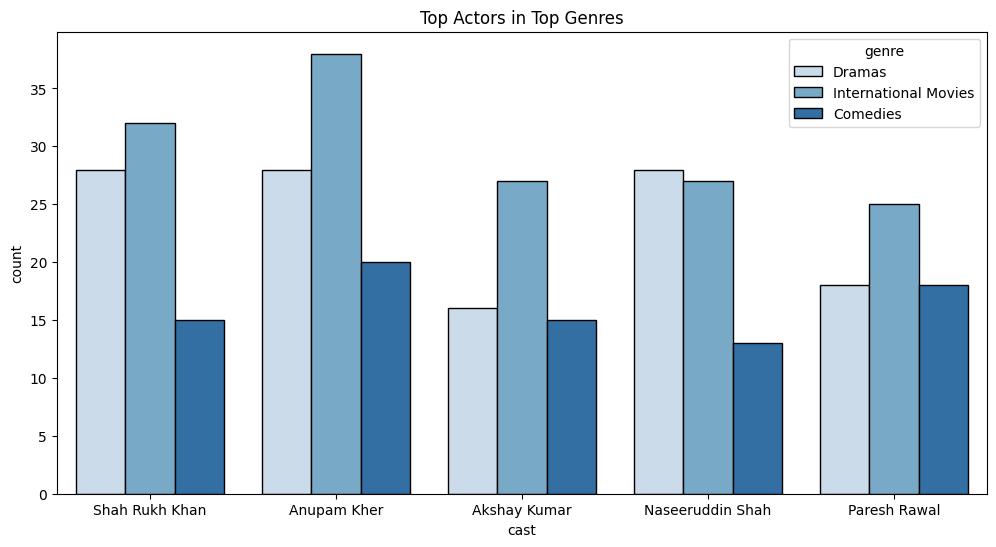

In [171]:
plt.figure(figsize=(12, 6))
sns.countplot(x='cast', data=df8, hue='genre', palette='Blues', edgecolor='black')
plt.title('Top Actors in Top Genres')
plt.show()

The End...
